In [23]:
import numpy as np 

# get scope embeddings from protein-vec
scope_protein_vec = np.load('/home/seyonec/protein-vec/src_run/protein_vec_embeddings/scope_all_query_embeddings.npy')

scope_protein_vec

array([[-8.833175  ,  6.2180605 ,  4.0923424 , ...,  0.86910766,
         5.8197947 , -2.3120422 ],
       [-8.853158  ,  6.249927  ,  4.083178  , ...,  0.8791264 ,
         5.7989206 , -2.371441  ],
       [-8.916473  ,  6.2099814 ,  4.185398  , ...,  0.821151  ,
         5.732552  , -2.4643846 ],
       ...,
       [-8.760139  ,  6.303917  ,  3.9584808 , ...,  0.9510072 ,
         5.79847   , -2.4893646 ],
       [-8.788359  ,  6.1799445 ,  4.1283817 , ...,  0.8592501 ,
         5.7609444 , -2.4434512 ],
       [-8.842473  ,  6.3074102 ,  4.146958  , ...,  0.7476833 ,
         5.682734  , -2.467361  ]], dtype=float32)

In [24]:
scope_protein_vec.shape

(15177, 512)

In [26]:
scope_df

,sequence,sid,sccs,class,fold,superfamily,family
0,SLFEQLGGQAAVQAVTAQFYANIQADATVATFFNGIDMPNQTNKTA...,d1dlwa_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
1,GLLSRLRKREPISIYDKIGGHEAIEVVVEDFFVRVLADDQLSAFFS...,d2gkma_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
2,KSFYDAVGGAKTFDAIVSRFYAQVAEDEVLRRVYPEDDLAGAEERL...,d1ngka_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
3,EQWQTLYEAIGGEETVAKLVEAFYRRVAAHPDLRPIFPDDLTETAH...,d2bkma_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
4,ASLYEKLGGAAAVDLAVEKFYGKVLADERVNRFFVNTDMAKQKQHQ...,d4i0va_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
...,...,...,...,...,...,...,...
15172,MPKVKRSRKAPPDGWELIEPTLDELDQKMREAETEPHEGKRKVESL...,d6id0n_,g.99.1.1,g,g.99,g.99.1,g.99.1.1
15173,NEPPPNICEQCLGDEANIRMTKIPQGSECKICTLPFTLYHFKTSKR...,d5lj3n2,g.100.1.1,g,g.100,g.100.1,g.100.1.1
15174,AKHHPDLIFCRKQAGVAIGRLCEKCDGKCVICDSYVRPSTLVRICD...,d5syba_,g.101.1.1,g,g.101,g.101.1,g.101.1.1
15175,RYCVFSHDEMICKMASKADVLDVVVASTVQKDMAIMIEDEKALRET...,d5fyza2,g.102.1.0,g,g.102,g.102.1,g.102.1.0


In [27]:
import pandas as pd
scope_test = pd.read_csv("/home/ron/toph/data/scope/progres_scope_test.txt", sep=" ", header=None, names=["sid", "sccs"])
scope_test

,sid,sccs
0,d3bb6a1,b.82.2.13
1,d1vqta1,c.1.2.3
2,d3nara_,a.4.1.1
3,d3euca_,c.67.1.0
4,d3aowa_,c.67.1.0
...,...,...
395,d2fjca1,a.25.1.1
396,d2mska_,c.23.1.1
397,d3eura1,c.47.1.0
398,d1p4ca_,c.1.4.1


In [30]:
# get test ids

test_idcs = scope_df["sid"].isin(scope_test["sid"])
test_idcs.sum()

400

In [31]:
lookup_df = scope_df[~test_idcs]
test_df = scope_df[test_idcs]


In [32]:
lookup_embeddings = scope_protein_vec[~test_idcs]
lookup_embeddings.shape

(14777, 512)

In [33]:
test_embeddings = scope_protein_vec[test_idcs]
test_embeddings.shape

(400, 512)

In [120]:
# count number of unique idcs in test_idcs and lookup_idcs
len(set(lookup_df["sid"])) + len(set(test_df["sid"]))

15177

In [38]:
lookup_df

,sequence,sid,sccs,class,fold,superfamily,family
0,SLFEQLGGQAAVQAVTAQFYANIQADATVATFFNGIDMPNQTNKTA...,d1dlwa_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
1,GLLSRLRKREPISIYDKIGGHEAIEVVVEDFFVRVLADDQLSAFFS...,d2gkma_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
2,KSFYDAVGGAKTFDAIVSRFYAQVAEDEVLRRVYPEDDLAGAEERL...,d1ngka_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
3,EQWQTLYEAIGGEETVAKLVEAFYRRVAAHPDLRPIFPDDLTETAH...,d2bkma_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
4,ASLYEKLGGAAAVDLAVEKFYGKVLADERVNRFFVNTDMAKQKQHQ...,d4i0va_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
...,...,...,...,...,...,...,...
15172,MPKVKRSRKAPPDGWELIEPTLDELDQKMREAETEPHEGKRKVESL...,d6id0n_,g.99.1.1,g,g.99,g.99.1,g.99.1.1
15173,NEPPPNICEQCLGDEANIRMTKIPQGSECKICTLPFTLYHFKTSKR...,d5lj3n2,g.100.1.1,g,g.100,g.100.1,g.100.1.1
15174,AKHHPDLIFCRKQAGVAIGRLCEKCDGKCVICDSYVRPSTLVRICD...,d5syba_,g.101.1.1,g,g.101,g.101.1,g.101.1.1
15175,RYCVFSHDEMICKMASKADVLDVVVASTVQKDMAIMIEDEKALRET...,d5fyza2,g.102.1.0,g,g.102,g.102.1,g.102.1.0


In [34]:
from scope_utils import scope_hierarchical_loss, load_database, query
# in this case we want to do all vs all search, so our lookup and query are the same
lookup = load_database(lookup_embeddings)
#query = load_database(scope_protein_vec)

## get distance matrix
D, I = query(lookup, test_embeddings, k=14777)



In [45]:
I

array([[   23,    19,    15, ..., 12110,  7353,  7438],
       [    9,    13,    22, ..., 12110,  7353,  7438],
       [   13,    50,    20, ..., 12110,  7353,  7438],
       ...,
       [14544, 14556, 14546, ..., 12391, 12433, 12403],
       [14584, 14534, 14536, ..., 10879,  7438,  7353],
       [14669, 14666, 14671, ..., 13948,  7353,  7438]])

In [44]:
test_df

,sequence,sid,sccs,class,fold,superfamily,family
6,EELSEAERKAVQAMWARLYANCEDVGVAILVRFFVNFPSAKQYFSQ...,d2dc3a_,a.1.1.2,a,a.1,a.1.1,a.1.1.2
15,PSVYDAAAQLTADVKKDLRDSWKVIGSDKKGNGVALMTTLFADNQE...,d3g46a_,a.1.1.2,a,a.1,a.1.1,a.1.1.2
27,TLTKHEQDILLKELGPHVDTPAHIVETGLGAYHALFTAHPQYISHF...,d1h97a_,a.1.1.2,a,a.1,a.1.1,a.1.1.2
35,TKEQIQIIKDCVPILQKNGEDLTNEFYKIMFNDYPEVKPMFNMEKQ...,d2wy4a_,a.1.1.0,a,a.1,a.1.1,a.1.1.0
53,MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLF...,d6wk3a_,a.1.1.0,a,a.1,a.1.1,a.1.1.0
...,...,...,...,...,...,...,...
14544,DICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCT...,d2hr7a2,g.3.9.0,g,g.3,g.3.9,g.3.9.0
14594,APRLPQCQGDDQEKCLCNKDECPPGQCRFPRGDADPYCE,d1deca_,g.3.15.2,g,g.3,g.3.15,g.3.15.2
14947,KTGGTQTDLFTCGKCKKKNCTYTQVQTRSADEPMTTFVVCNECGNR...,d1tfia_,g.41.3.1,g,g.41,g.41.3,g.41.3.1
14985,MSTKNFRVSDGDWICPDKKCGNVNFARRTSCDRCGREKTT,d1n0za1,g.41.11.1,g,g.41,g.41.11,g.41.11.1


In [64]:
# get indices of true elements in test_idcs
true_test_idcs = np.where(test_idcs)[0]
true_test_idcs

array([    6,    15,    27,    35,    53,    55,    94,   168,   174,
         186,   194,   198,   221,   225,   234,   235,   245,   281,
         288,   294,   333,   340,   384,   424,   460,   464,   493,
         518,   525,   546,   551,   557,   600,   610,   811,   848,
         893,  1023,  1032,  1194,  1200,  1203,  1204,  1214,  1226,
        1232,  1237,  1428,  1439,  1446,  1455,  1457,  1760,  1769,
        1784,  1794,  1941,  1946,  1954,  1972,  1973,  1995,  2015,
        2032,  2055,  2663,  2678,  2761,  2764,  2772,  2775,  2806,
        2812,  2815,  2816,  2836,  2848,  2853,  2872,  2875,  2904,
        2924,  2953,  2973,  3030,  3035,  3039,  3052,  3066,  3102,
        3105,  3127,  3180,  3183,  3206,  3216,  3218,  3219,  3246,
        3252,  3258,  3265,  3266,  3269,  3348,  3355,  3365,  3366,
        3398,  3404,  3413,  3428,  3614,  3756,  3769,  3773,  3834,
        3837,  3877,  3882,  3912,  3920,  3938,  3946,  3955,  4105,
        4133,  4134,

In [81]:
lookup_idcs = scope_df["sid"].isin(scope_test["sid"])

# invert lookup_idcs array
lookup_idcs = ~lookup_idcs

lookup_idcs = np.where(lookup_idcs)[0]
lookup_idcs

array([    0,     1,     2, ..., 15174, 15175, 15176])

In [85]:
(lookup_df.index == lookup_idcs).sum()

14777

In [65]:
# index row i column 'sccs' of test_df
test_df.loc[true_test_idcs[0], 'sccs']

'a.1.1.2'

In [89]:
test_df.loc[true_test_idcs[0], 'sccs'] == lookup_df.loc[lookup_idcs[0], 'sccs']

False

In [92]:
test_df.loc[true_test_idcs[0], 'sid']

'd2dc3a_'

In [99]:
true_test_idcs.tolist()

[6,
 15,
 27,
 35,
 53,
 55,
 94,
 168,
 174,
 186,
 194,
 198,
 221,
 225,
 234,
 235,
 245,
 281,
 288,
 294,
 333,
 340,
 384,
 424,
 460,
 464,
 493,
 518,
 525,
 546,
 551,
 557,
 600,
 610,
 811,
 848,
 893,
 1023,
 1032,
 1194,
 1200,
 1203,
 1204,
 1214,
 1226,
 1232,
 1237,
 1428,
 1439,
 1446,
 1455,
 1457,
 1760,
 1769,
 1784,
 1794,
 1941,
 1946,
 1954,
 1972,
 1973,
 1995,
 2015,
 2032,
 2055,
 2663,
 2678,
 2761,
 2764,
 2772,
 2775,
 2806,
 2812,
 2815,
 2816,
 2836,
 2848,
 2853,
 2872,
 2875,
 2904,
 2924,
 2953,
 2973,
 3030,
 3035,
 3039,
 3052,
 3066,
 3102,
 3105,
 3127,
 3180,
 3183,
 3206,
 3216,
 3218,
 3219,
 3246,
 3252,
 3258,
 3265,
 3266,
 3269,
 3348,
 3355,
 3365,
 3366,
 3398,
 3404,
 3413,
 3428,
 3614,
 3756,
 3769,
 3773,
 3834,
 3837,
 3877,
 3882,
 3912,
 3920,
 3938,
 3946,
 3955,
 4105,
 4133,
 4134,
 4139,
 4142,
 4145,
 4156,
 4176,
 4177,
 4194,
 4199,
 4205,
 4230,
 4233,
 4237,
 4313,
 4328,
 4337,
 4345,
 4349,
 4367,
 4369,
 4371,
 4405,
 4

In [114]:
lookup_idcs

array([    0,     1,     2, ..., 15174, 15175, 15176])

In [117]:
sum(I[1] > 15000)

0

In [123]:
lookup_idcs[14776]

15176

In [121]:
lookup_idcs

array([    0,     1,     2, ..., 15174, 15175, 15176])

In [125]:
near_ids = []

for i in range(len(true_test_idcs)):
    test_id = test_df.loc[true_test_idcs[i], 'sid']
    test_sccs = test_df.loc[true_test_idcs[i], 'sccs']
    query_ids = [lookup_df.loc[lookup_idcs[j], 'sid'] for j in I[i]]
    mask_exact = [test_sccs == lookup_df.loc[lookup_idcs[j], 'sccs'] for j in I[i]]

    near_ids.append({
        'test_id': test_id,
        'query_ids': query_ids,
        #'meta_query': meta_query,
        'exact': mask_exact,
        #'partial': mask_partial,
        'S_i': D[i],
        'I_i': I[i]
    })

In [128]:
## number of trues in list
#sum([n['exact'] for x in near_ids])
sum(near_ids[210]['exact'])

26

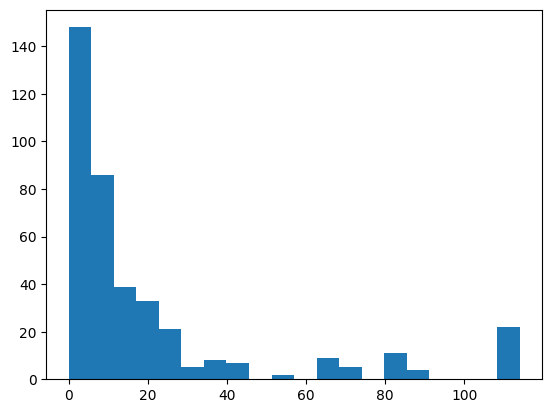

In [129]:
## Plot histogram of near_idws[i]['exact'] for i in range(400)
import matplotlib.pyplot as plt
plt.hist([sum(n['exact']) for n in near_ids], bins=20)
plt.show()

In [137]:
np.save('near_ids_scope_test_v_lookup.npy', near_ids)


In [136]:
## find number of matching elements
exact_matches = np.array([sum(n['exact']) for n in near_ids])

# find numb3er of elements with 0 matches
(exact_matches == 0).sum()

2

In [108]:
scope_emb = '/home/seyonec/protein-vec/src_run/protein_vec_embeddings/scope_all_query_embeddings.npy'
## open with numpy, save with pkl
scope_emb = np.load(scope_emb)
scope_emb.shape
# save as pkl
import pickle
with open('/home/seyonec/protein-vec/src_run/protein_vec_embeddings/scope_all_query_embeddings.pkl', 'wb') as f:
    pickle.dump(scope_emb, f)

# all vs all

In [15]:
from scope_utils import scope_hierarchical_loss, load_database, query
# in this case we want to do all vs all search, so our lookup and query are the same
lookup = load_database(scope_protein_vec)
#query = load_database(scope_protein_vec)

## get distance matrix
D, I = query(lookup, scope_protein_vec, k=15177)



In [16]:
D.shape

(15177, 15177)

In [18]:
## Save the distance matrix, and index matrix
np.save('scope_protein_vec_distance_matrix.npy', D)
np.save('scope_protein_vec_index_matrix.npy', I)

In [28]:
import pandas as pd
scope_df = pd.read_csv('/home/seyonec/toph/data/scope/df_from_fasta.csv', sep=',', index_col=0)
scope_df.head()

## uppercase sequences
scope_df['sequence'] = scope_df['sequence'].apply(lambda x: x.upper())


In [24]:
scope_labels = scope_df['sccs'].tolist()

In [30]:
# for each row in I, find the threshold for similiarity that ensures that the sccs are the same with the query, by using the row index and entry index and scope_labels to compare if they are the same
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        if scope_labels[i] == scope_labels[I[i,j]]:
            print(i, I[i,j], D[i,j], scope_labels[i], scope_labels[I[i,j]])
            break

0 0 1.0 a.1.1.1 a.1.1.1
1 1 1.0 a.1.1.1 a.1.1.1
2 2 1.0 a.1.1.1 a.1.1.1
3 3 1.0 a.1.1.1 a.1.1.1
4 4 1.0000002 a.1.1.1 a.1.1.1
5 5 0.99999994 a.1.1.2 a.1.1.2
6 6 0.9999997 a.1.1.2 a.1.1.2
7 7 1.0000001 a.1.1.2 a.1.1.2
8 8 0.99999976 a.1.1.2 a.1.1.2
9 9 1.0000001 a.1.1.2 a.1.1.2
10 10 1.0000002 a.1.1.2 a.1.1.2
11 11 1.0000002 a.1.1.2 a.1.1.2
12 12 1.0000001 a.1.1.2 a.1.1.2
13 13 0.99999976 a.1.1.2 a.1.1.2
14 14 1.0 a.1.1.2 a.1.1.2
15 15 1.0000002 a.1.1.2 a.1.1.2
16 16 1.0 a.1.1.2 a.1.1.2
17 17 0.99999994 a.1.1.2 a.1.1.2
18 18 1.0000001 a.1.1.2 a.1.1.2
19 19 0.9999999 a.1.1.2 a.1.1.2
20 20 1.0000002 a.1.1.2 a.1.1.2
21 21 1.0000002 a.1.1.2 a.1.1.2
22 22 1.0000001 a.1.1.2 a.1.1.2
23 23 1.0000001 a.1.1.2 a.1.1.2
24 24 1.0000005 a.1.1.2 a.1.1.2
25 25 0.9999999 a.1.1.2 a.1.1.2
26 26 1.0000001 a.1.1.2 a.1.1.2
27 27 1.0 a.1.1.2 a.1.1.2
28 28 0.9999999 a.1.1.2 a.1.1.2
29 29 0.9999999 a.1.1.2 a.1.1.2
30 30 1.0000001 a.1.1.3 a.1.1.3
31 31 1.0000002 a.1.1.3 a.1.1.3
32 32 1.0 a.1.1.3 a.1.1.3
33 33 0.

### todo
- get data into format of conformal pfam dataset (look at Ron/Anastasios code)
- get conformal lambda analysis working 
- generate similar FNR/FPR plot

In [12]:
D = np.load('scope_protein_vec_distance_matrix.npy')
I = np.load('scope_protein_vec_index_matrix.npy')

In [19]:
match = slice == I[:, 0]
# sum number of trues in match 
np.sum(match) ## all are self match

15177

In [15]:
I[:, 0]

array([    0,     1,     2, ..., 15174, 15175, 15176])

In [13]:
# check if np array is ascending
slice = I[:, 0].copy()
slice.sort() == I[:, 0]

array([False, False, False, ..., False, False, False])

In [22]:
data[1]

{'meta': array(['PF19429;', 'PF19429;', 'PF19429;', ..., 'PF08259;', 'PF08259;',
        'PF08259;'], dtype=object),
 'meta_query': 'PF19429;',
 'exact': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  F

In [1]:
import numpy as np
data = np.load('/home/ron/protein-conformal/conformal_pfam_with_lookup_dataset.npy', allow_pickle=True)

data.shape

(10000,)

In [2]:
len(data[0]['exact'])

10000

In [3]:
data

array([{'meta': array(['PF01266;', 'PF01266;', 'PF01266;', ..., 'PF02803;PF00108;',
              'PF04072;', 'PF01255;'], dtype=object), 'meta_query': 'PF01266;', 'exact': [True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru